<H1> A very basic project on Data Science </H1>

Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Reading csv file from github


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pdscorg/Data/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


Information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               999 non-null    object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   999 non-null    float64
 6   reading score                998 non-null    float64
 7   writing score                999 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


Missing values? Let's check

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 1
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  2
writing score                  1
dtype: int64

We want to fill the missing values. Mean or median?

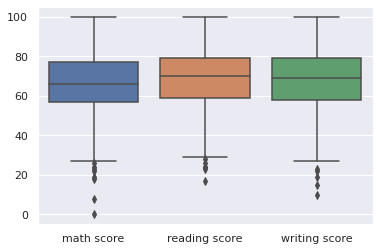

In [5]:
sns.boxplot(data=df)

Outliers! We use median

In [6]:
df.fillna(df.median(), inplace=True)

Still missing values? Let's check

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 1
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Which race/ethnicity is the most repeated?

In [8]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     88
Name: race/ethnicity, dtype: int64

In [9]:
a = df['race/ethnicity'].value_counts().index[0]
print(a)

group C


Fill the missing race/ethnicity with the most repeated value

In [10]:
df.fillna(a, inplace=True)

Do we have any missing values now?

In [11]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Was it replaced correctly?

In [12]:
df['race/ethnicity'].value_counts()

group C    320
group D    262
group B    190
group E    140
group A     88
Name: race/ethnicity, dtype: int64

Correlation among numeric features

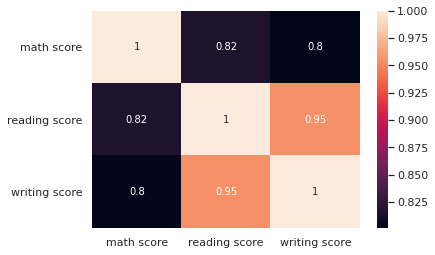

In [13]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Does gender has any impact?

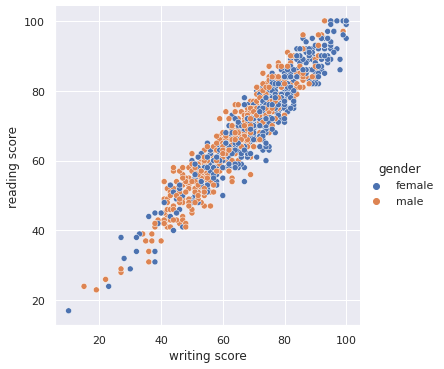

In [14]:
sns.relplot(x='writing score', y='reading score', hue='gender', data=df)

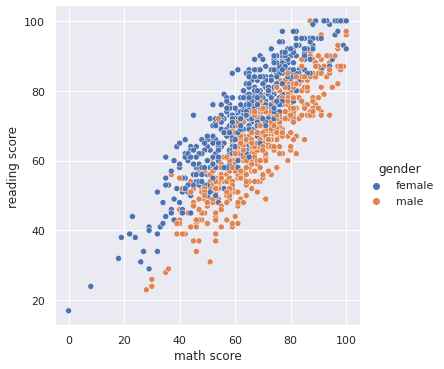

In [15]:
sns.relplot(x='math score', y='reading score', hue='gender', data=df)

Let's get the exact mean result

In [16]:
avg_male_maths_score = df[df['gender']=='male']['math score'].median()
avg_female_maths_score = df[df['gender']=='female']['math score'].median()

print(f"For this data, average maths score for male students is: {round(avg_male_maths_score, 2)}")
print(f"For this data, average maths score for female students is: {round(avg_female_maths_score, 2)}")

For this data, average maths score for male students is: 69.0
For this data, average maths score for female students is: 65.0


Distribution of marks

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


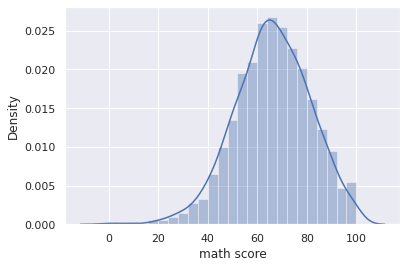

In [17]:
sns.distplot(df['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


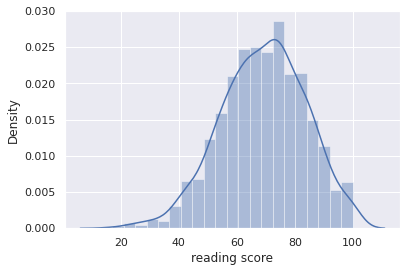

In [18]:
sns.distplot(df['reading score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


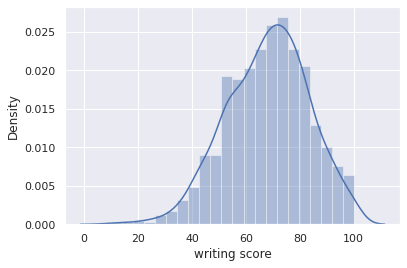

In [19]:
sns.distplot(df['writing score'])

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


Converting  categorical data to numeric values!

In [21]:
# df_test = df.copy()
# replacing_values = {'gender': {'male': 0, 'female': 1},
#                     'lunch': {'free/reduced': 0, 'standard': 1},
#                     'parental level of education': {'some high school': 0, 'high school': 1,
#                                                     'some college': 2, "bachelor's degree": 3,
#                                                     "associate's degree": 4, "master's degree": 5},
#                     'race/ethnicity': {'group E': 0, 'group D': 1, 'group C': 2, 'group B': 3, 'group A': 4},
#                     'test preparation course': {'none': 0, 'completed': 1}}

# df_test.replace(replacing_values, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_categorical = df[df.columns[:-3]].apply(le.fit_transform)
df_categorical
# ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
...,...,...,...,...,...
995,0,4,3,1,0
996,1,2,2,0,1
997,0,2,2,0,0
998,0,3,4,1,0


In [23]:
df = pd.concat([df_categorical, df[['math score', 'reading score', 'writing score']]], axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72.0,72.0,74.0
1,0,2,4,1,0,69.0,90.0,88.0
2,0,1,3,1,1,90.0,95.0,93.0
3,1,0,0,0,1,47.0,57.0,44.0
4,1,2,4,1,1,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88.0,99.0,95.0
996,1,2,2,0,1,62.0,55.0,55.0
997,0,2,2,0,0,59.0,71.0,65.0
998,0,3,4,1,0,68.0,78.0,77.0


Splitting data into training and testing data

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2, random_state=33, shuffle=True)

Logistic regression machine learning model 

In [25]:
model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.885

Predict if the student is male or female. (0 for male, 1 for female, 1 or 0 depends on encoding method)

In [26]:
model.predict(np.array([1, 2, 3, 4, 5, 6, 7]).reshape(1, -1))

array([0])

Taking input from user to predict instead

In [30]:
# race = input("Enter your race")
# p_edu = input("Enter parental level of education")
# lunch = input("Enter your lunch type")
# test_course = input("Enter your test preparation course")
# maths = input("Enter your math score")
# reading = input("Enter your reading score")
# writing = input("Enter your writing score")
# v = [race, p_edu, lunch, test_course, maths, reading, writing]

v = []
for i in range(1, len(df.columns)):
  ans = int(input(f"Enter your {df.columns[i]}: "))
  v.append(ans)

result = model.predict(np.array(v).reshape(1, -1))[0]
if result == 1: # 1 or 0 depends on encoding method
  print("\nIT IS MALE")
else:
  print("\nIT IS FEMALE")


Enter your race/ethnicity: 1
Enter your parental level of education: 1
Enter your lunch: 1
Enter your test preparation course: 1
Enter your math score: 72
Enter your reading score: 74
Enter your writing score: 72

IT IS FEMALE


In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72.0,72.0,74.0
1,0,2,4,1,0,69.0,90.0,88.0
2,0,1,3,1,1,90.0,95.0,93.0
3,1,0,0,0,1,47.0,57.0,44.0
4,1,2,4,1,1,76.0,78.0,75.0
